In [3]:
# Import necessary packages
import os
import pathlib
import pandas as pd # Aggregating, data manipulation
import re # Parsing information out of file names
import rioxarray as rxr # Work with raster data
from rioxarray.merge import merge_arrays # Merge rasters
import geopandas as gpd # Work with vector data
import hvplot.pandas
import xrspatial
from math import floor, ceil
import matplotlib.pyplot as plt
import glob
import warnings


# A Note on the Data
A [National Grassland unit](https://data.fs.usda.gov/geodata/edw/edw_resources/shp/S_USA.NationalGrassland.zip) designated by the Secretary of Agriculture and permanently held by the Department of Agriculture under Title III of the Bankhead-Jones Farm Tenant Act.

This data is intended for read-only use. These data were prepared to describe Forest Service administrative area boundaries. The purpose of the data is to provide display, identification, and analysis tools for determining current boundary information for Forest Service managers, GIS Specialists, and others.

In [4]:
# Set up a project data directory

# Step 1: Get the home folder path
home_folder = os.path.expanduser("~")

# Step 2: Define the project directory within the home folder
project_dir = os.path.join(
    pathlib.Path.home(),
    'earth-analytics',
    'data',
    'habitat_suitability',
    'strm'
)

# Step 3: Create the project directory if it doesn't already exist
os.makedirs(project_dir, exist_ok=True)

# Step 4: Confirm creation
print(f"Project directory created at: {project_dir}")

os.makedirs(project_dir, exist_ok=True)

Project directory created at: /Users/erinzimmerman/earth-analytics/data/habitat_suitability/strm


In [5]:
# Set up the USFS National Grassland Units boundary URL
habitat_url = (
    "https://data.fs.usda.gov"
    "/geodata/edw/edw_resources/shp/"
    "S_USA.NationalGrassland.zip"
)

# Set up a path to save the data on your machine
habitat_dir = os.path.join(project_dir, 'usfs_grassland')

# Make the USFS National Grassland Units directory
os.makedirs(habitat_dir, exist_ok=True)

# Join USFS National Grassland Units shapefile path
habitat_path = os.path.join(habitat_dir, 'usfs_grassland.shp')

# Only download once
if not os.path.exists(habitat_path):
    habitat_gdf = gpd.read_file(habitat_url)
    habitat_gdf.to_file(habitat_path)

# Load from file
habitat_gdf = gpd.read_file(habitat_path)

# Study Area(s)

### Sheyenne National Grassland

Our first study areas is Sheyenne National Grassland, located in southeastern North Dakota, comprising 70,180 acres (28,400 ha) of public land amid 64,769 acres (26,211 ha) of privately owned land. It is characterized by sandy soils, originally deposited as the delta of an ancient river as it emptied into glacial Lake Agassiz. Since that time, wind and rain have shaped the topography into a unique landscape ranging from flat deltaic plains to choppy sand dunes.

It is the only National Grassland in the tallgrass prairie region of the United States.

Reference:
    [US Forest Service](https://www.fs.usda.gov/recarea/dpg/recarea/?recid=79470)


In [7]:
# select data from Sheyenne National Grassland only
habitat1_gdf = habitat_gdf[habitat_gdf.GRASSLANDN=='Sheyenne National Grassland']
habitat1_gdf.dissolve().hvplot(
    geo=True, tiles='EsriImagery',
    title='Sheyenne National Grassland',
    fill_color=None, line_color='red', line_width=1,
    frame_width=600
)

:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [Longitude,Latitude]

<Axes: >

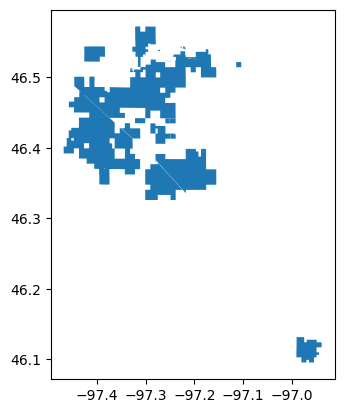

In [9]:
# Define bounds for Sheyanne National Grasslands
habitat1_bounds = bounds_min_lon, bounds_min_lat, bounds_max_lon, bounds_max_lat = (
    habitat1_gdf.total_bounds)

habitat1_gdf.plot()

# Habitat 2 - Little Missouri National Grassland

The second study area is Little Missouri National Grassland.The largest National Grassland, Little Missouri includes badlands and short and long grass prairie. 

The Little Missouri National Grassland was once a part of the Custer National Forest, but is now a part of the Dakota Prairie Grasslands, a National Forest unit consisting entirely of National Grasslands. A predominant feature of the grassland is colorful and beautiful badlands, a rugged terrain extensively eroded by wind and water. It is a mixed-grass prairie with both long and short grass.[4][5]

The Little Missouri River meanders through the grassland and White Butte, North Dakota's highest point, is located in the extreme southeast corner, south of the town of Amidon [Little Missouri National Grassland Wikipedia page.](https://en.wikipedia.org/wiki/Little_Missouri_National_Grassland)

In [10]:
# select data from Little Missouri National Grassland
habitat2_gdf = habitat_gdf[habitat_gdf.GRASSLANDN=='Little Missouri National Grassland']
habitat2_gdf.dissolve().hvplot(
    geo=True, tiles='EsriImagery',
    title='Little Missouri National Grassland',
    fill_color=None, line_color='red', line_width=3,
    frame_width=800
)

:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [Longitude,Latitude]

In [ ]:
%store habitat1_gdf habitat2_gdf project_dir